Summary: verify travel times. Judge by comparing the error between grid and reported travel times. (assume I can use 3200 grid?)

In [1]:
import csv
import collections
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
import seaborn as sns

## load all data

In [2]:
# This is the grid object, which is used throughout all data preprocessing.
# It represents the city of Austin through a series of grids.
# It thus makes a tractable way to compute distance between grids, ect. 
class Grid():
    def __init__(self, grid_json):
        self.grid = grid_json
        self.min_lat = self.grid["latitude_min"]
        self.min_lon = self.grid["longitude_min"]
        self.max_lat = self.grid["latitude_max"]
        self.max_lon = self.grid["longitude_max"]
        self.latitude_delta = self.grid["latitude_step"]
        self.longitude_delta = self.grid["longitude_step"]
        self.nrows = math.ceil((self.max_lat - self.min_lat) / self.latitude_delta)
        self.ncols = math.ceil((self.max_lon - self.min_lon) / self.longitude_delta)
        self.times = self.grid["time_matrix"]
        self.census_tract_region_map = self.grid["census_tract_region_mapping"]
        self.region_to_tract = collections.defaultdict(list)
        for census_tract in self.census_tract_region_map:
            for region in self.census_tract_region_map[census_tract]:
                self.region_to_tract[region].append(census_tract)
    def map_point_to_region(self, latitude, longitude):
        return math.floor((latitude-self.min_lat)/self.latitude_delta) * self.ncols  + math.floor((longitude-self.min_lon)/self.longitude_delta)
    def get_representative(self, region_num):
        row_num = region_num//self.ncols
        col_num = region_num - row_num*self.ncols
        lat = self.min_lat + row_num * self.latitude_delta + 0.5*self.latitude_delta
        lon = self.min_lon + col_num * self.longitude_delta + 0.5*self.longitude_delta
        return [lon, lat]
    def get_time(self, region1, region2):
        try:
            return self.times[region1][region2]
        except IndexError:
            return -1
    def region_to_census_tract(self, region):
        try:
            return self.region_to_tract[region]
        except KeyError:
            return "0_0"

In [3]:
peakHours = (np.genfromtxt("..\Output_Data/peakHours.csv", delimiter=",", dtype = str))

with open("..\Input_Data/grid_info_multiple.json", "r") as f:
    grid_json = json.load(f)
g = Grid(grid_json)

In [4]:
peakHours[0]

array(['', 'IncidentForeignKey', 'Radio_Name', 'Longitude_At_Assign_Time',
       'Latitude_At_Assign_Time', 'Time_Assigned', 'Time_Enroute',
       'Time_ArrivedAtScene', 'Time_Depart_Scene',
       'Time_Arrive_Destination', 'Time_Available', 'Time_Call_Cleared',
       'Call_Disposition', 'Longitude_Of_Emergency',
       'Latitude_Of_Emergency', 'transport_time', 'grid_time'],
      dtype='<U30')

## compare error with no adjustment
possibly adjust for dow, hour, number of grid tiles, specific path

In [5]:
print(peakHours[0,3]) #Longitude_At_Assign_Time
print(peakHours[0,4]) #Latitude_At_Assign_Time
print(peakHours[0,5]) #Time_Assigned
print(peakHours[0,6]) #Time_Enroute
print(peakHours[0,7]) #Time_ArrivedAtScene
print(peakHours[0,8]) #Time_Depart_Scene
print(peakHours[0,9]) #Time_Arrive_Destination
print(peakHours[0,10]) #Time_Available
print(peakHours[0,11]) #Time_Call_Cleared
print(peakHours[0,13]) #Longitude_Of_Emergency
print(peakHours[0,14]) #Latitude_Of_Emergency
print(peakHours[0,15]) #travel_time
print(peakHours[0,16]) #grid_time

Longitude_At_Assign_Time
Latitude_At_Assign_Time
Time_Assigned
Time_Enroute
Time_ArrivedAtScene
Time_Depart_Scene
Time_Arrive_Destination
Time_Available
Time_Call_Cleared
Longitude_Of_Emergency
Latitude_Of_Emergency
transport_time
grid_time


In [6]:
nsamples = 1000 #len(peakHours)
error_list = []
error_percent = []
grid_list = []
for i in range(1,nsamples):
    start_pt = g.map_point_to_region(float(peakHours[i,4]),float(peakHours[i,3]))
    end_pt = g.map_point_to_region(float(peakHours[i,14]),float(peakHours[i,13]))
    grid_time = g.get_time(start_pt,end_pt)
    print(str(grid_time) + " :: " + peakHours[i,16])
    reported_time = float(peakHours[i,15])
#     if(reported_time -  grid_time < 2000):
#         print(str(start_pt) + " " + str(end_pt))
    error_list.append(reported_time -  grid_time)
    #error percent
    if(grid_time > reported_time):
        error_percent.append(grid_time/reported_time - 1)
    else: #grid_time <= reported_time
        error_percent.append(-1 * (1 - grid_time/reported_time))

222.72 :: 222.72
997.13 :: 997.13
785.89 :: 785.89
765.31 :: 765.31
306.94 :: 306.94
564.98 :: 564.98
236.47 :: 236.47
861.21 :: 861.21
241.42 :: 241.42
425.35 :: 425.35
0 :: 0.0
3118.58 :: 3118.58
345.71 :: 345.71
251.71 :: 251.71
564.98 :: 564.98
786.69 :: 786.69
258.82 :: 258.82
0.0 :: 0.0
791.54 :: 791.54
333.58 :: 333.58
532.05 :: 532.05
852.55 :: 852.55
951.4 :: 951.4
294.51 :: 294.51
0 :: 0.0
670.78 :: 670.78
559.16 :: 559.16
509.56 :: 509.56
0 :: 0.0
236.47 :: 236.47
643.43 :: 643.43
786.69 :: 786.69
533.19 :: 533.19
626.04 :: 626.04
347.81 :: 347.81
738.45 :: 738.45
2064.25 :: 2064.25
586.54 :: 586.54
626.04 :: 626.04
426.86 :: 426.86
510.83 :: 510.83
625.49 :: 625.49
333.58 :: 333.58
392.39 :: 392.39
683.43 :: 683.43
328.51 :: 328.51
453.64 :: 453.64
0 :: 0.0
447.38 :: 447.38
598.22 :: 598.22
976.54 :: 976.54
625.49 :: 625.49
625.49 :: 625.49
553.08 :: 553.08
603.34 :: 603.34
337.36 :: 337.36
619.25 :: 619.25
784.19 :: 784.19
635.65 :: 635.65
645.64 :: 645.64
602.09 :: 602.09

2.062205423408877
1.8048832749599404
24.99134113626784
747.64


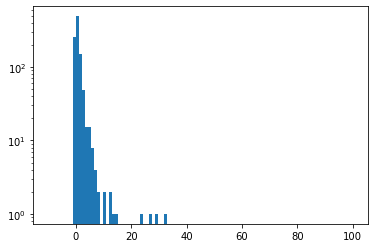

In [7]:
#plt.hist(error_list, bins = 100, log = True)
a = plt.hist(error_percent, bins = 100, range = (-10,100), log = True)
print(np.mean(np.abs(error_percent)))
print(np.mean(error_percent))
print(np.std(error_percent))
print(np.max(np.abs(error_percent)))

## Batches

In [15]:
#Summary: here we are comparing grid and reported travel time
#jupyter functions assume many variables are global like g (grid object) and peakHours (np array)
def nsample_verification(sample_start,nsamples):
    error_list = []
    error_percent = []
    for i in range(sample_start,sample_start + nsamples):
        start_pt = g.map_point_to_region(float(peakHours[i,4]),float(peakHours[i,3]))
        end_pt = g.map_point_to_region(float(peakHours[i,14]),float(peakHours[i,13]))
        grid_time = g.get_time(start_pt,end_pt)
        reported_time = float(peakHours[i,15])
    #     if(reported_time -  grid_time < 2000):
    #         print(str(start_pt) + " " + str(end_pt))
        error_list.append(reported_time -  grid_time)
        #error percent
        if(grid_time > reported_time):
            error_percent.append(grid_time/reported_time - 1)
        else: #grid_time <= reported_time
            error_percent.append(-1 * (1 - grid_time/reported_time))
#     print(np.mean(np.abs(error_percent)))
#     print(np.mean(error_percent))
#     print(np.std(error_percent))
#     print(np.max(np.abs(error_percent)))
    return (np.mean(np.abs(error_percent)), np.mean(error_percent),np.std(error_percent),np.max(np.abs(error_percent)),np.mean(error_list),np.std(error_list))

In [16]:
#adjust by adding a global weight
W_GLOBAL = 1.5673e-2 #1.5673 percent -> ?seconds
def nsample_verification_global(sample_start,nsamples):
    error_list = []
    error_percent = []
    for i in range(sample_start,sample_start + nsamples):
        start_pt = g.map_point_to_region(float(peakHours[i,4]),float(peakHours[i,3]))
        end_pt = g.map_point_to_region(float(peakHours[i,14]),float(peakHours[i,13]))
        grid_time = g.get_time(start_pt,end_pt)
        grid_time = grid_time - 146
        reported_time = float(peakHours[i,15])
        error_list.append(reported_time -  grid_time)
        #error percent
        if(grid_time > reported_time):
            error_percent.append(grid_time/reported_time - 1)
        else: #grid_time <= reported_time
            error_percent.append(-1 * (1 - grid_time/reported_time))
    return (np.mean(np.abs(error_percent)), np.mean(error_percent),np.std(error_percent),np.max(np.abs(error_percent)),np.mean(error_list),np.std(error_list))

In [17]:
#adjust by adding seconds depending on time bin
time_bins = np.array([ 250, 550, 850, 1150, 1450, 1750])
time_bin_weights = np.array([201.70483660130716, 10.166325878594247, -208.83953125000002, -460.87083333333334, -775.0755555555556, -1046.168888888889, -1527.7117647058826]) 

def gridTime2Bin(grid_time):
    for i in range(time_bins.shape[0]):
        if(grid_time < time_bins[i]):
            return (i)
    return time_bins.shape[0]

def nsample_verification_times(sample_start,nsamples):
    error_list = []
    error_percent = []
    for i in range(sample_start,sample_start + nsamples):
        start_pt = g.map_point_to_region(float(peakHours[i,4]),float(peakHours[i,3]))
        end_pt = g.map_point_to_region(float(peakHours[i,14]),float(peakHours[i,13]))
        grid_time = g.get_time(start_pt,end_pt)
        grid_time = grid_time + time_bin_weights[gridTime2Bin(grid_time)]
        
        reported_time = float(peakHours[i,15])
        error_list.append(reported_time -  grid_time)
        #error percent
        if(grid_time > reported_time):
            error_percent.append(grid_time/reported_time - 1)
        else: #grid_time <= reported_time
            error_percent.append(-1 * (1 - grid_time/reported_time))
    return (np.mean(np.abs(error_percent)), np.mean(error_percent),np.std(error_percent),np.max(np.abs(error_percent)),np.mean(error_list),np.std(error_list))

In [43]:
#log-log linear regression
slope = 0.23868463365149437 
intercept = 1.261777659720721

def nsample_verification_log_regression(sample_start,nsamples):
    error_list = []
    error_percent = []
    for i in range(sample_start,sample_start + nsamples):
        start_pt = g.map_point_to_region(float(peakHours[i,4]),float(peakHours[i,3]))
        end_pt = g.map_point_to_region(float(peakHours[i,14]),float(peakHours[i,13]))
        grid_time = g.get_time(start_pt,end_pt)
        grid_time = grid_time / 60
        if(grid_time  < .1):
            continue
        grid_time = np.exp(np.log(grid_time)*slope + intercept)       
        
        reported_time = float(peakHours[i,15]) / 60
        error_list.append(reported_time -  grid_time)
        #error percent
        if(grid_time > reported_time):
            error_percent.append(grid_time/reported_time - 1)
        else: #grid_time <= reported_time
            error_percent.append(-1 * (1 - grid_time/reported_time))
    return np.mean(error_list),np.std(error_list)


In [44]:
np.random.seed(0)
mrp_mean_secs = []
mrp_std_secs = []
for i in range(20):
    nsamples = 1000
    start = np.random.randint(low = 1, high = len(peakHours) - nsamples)
    mean_seconds, std_seconds = nsample_verification_log_regression(start,nsamples)
    mrp_mean_secs.append(mean_seconds)
    mrp_std_secs.append(std_seconds)
    sample_ind.append(start)

In [45]:
print(np.mean(mrp_mean_secs))
print(np.std(mrp_mean_secs))
print(np.mean(mrp_std_secs))
print(np.std(mrp_std_secs))

0.9459934054929257
0.5485883217552645
10.312311628294795
15.522823813900242


print(np.mean(mrp_mean_secs))
print(np.std(mrp_mean_secs))
print(np.mean(mrp_std_secs))
print(np.std(mrp_std_secs))

Original:
    -169.3827825
    43.433218727562995
    865.5796475482963
    909.0123950506306
Global:
    -23.382782499999998
    43.433218727562995
    865.5796475482963
    909.0123950506306
Bins:   
    -10.426597950259458
    37.34551863813396
    734.4298909383522
    965.1893347678395
log-log regression:
    0.9459934054929257
    0.5485883217552645
    10.312311628294795
    15.522823813900242



In [14]:
#MRP? https://uweb.engr.arizona.edu/~guzinb/webpage_before_June_30_2008/files/bm_compstat.pdf